In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('adult.csv')

In [4]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


#### Этот датасет уже изучал в домашней работе #1, возьму из этой работы "лучшее" и добалю то, что упустил в первый раз - разделение на тестовую и валидационную выборку и StandardScaler.

In [6]:
selectedColumns = data[ [ 'age', 'education', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country' ] ]
X = pd.get_dummies( selectedColumns, columns = [ 'education', 'occupation', 'relationship', 'race', 'gender', 'native-country' ] )
y = data['income']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.3)

In [8]:
X_train.head()

,age,capital-gain,capital-loss,hours-per-week,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
7698,42,0,0,24,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
39530,37,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32100,23,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48422,34,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11072,29,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
scaled_features = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[scaled_features] = scaler.fit_transform(X_train[scaled_features])
X_validation[scaled_features] = scaler.transform(X_validation[scaled_features])

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_validation = le.transform(y_validation)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [12]:
models = [
    {
        'name': 'LogisticRegression penalty - l1',
        'classifier': LogisticRegression(penalty='l1'),
    },
    {
        'name': 'LogisticRegression penalty - l2',
        'classifier': LogisticRegression(penalty='l2'),
    },
    {
        'name': 'KNeighborsClassifier n_neighbors - 5',
        'classifier': KNeighborsClassifier(n_neighbors=5),
    },
    {
        'name': 'KNeighborsClassifier n_neighbors - 10',
        'classifier': KNeighborsClassifier(n_neighbors=10),
    },
    {
        'name': 'DecisionTreeClassifier max_depth - 3',
        'classifier': DecisionTreeClassifier(max_depth=3),
    },
    {
        'name': 'DecisionTreeClassifier max_depth - 7',
        'classifier': DecisionTreeClassifier(max_depth=7),
    },
    {
        'name': 'RandomForestClassifier n_estimators - 10',
        'classifier': RandomForestClassifier(n_estimators=10),
    },
    {
        'name': 'RandomForestClassifier n_estimators - 20',
        'classifier': RandomForestClassifier(n_estimators=20),
    },
    {
        'name': 'GradientBoostingClassifier loss - deviance',
        'classifier': GradientBoostingClassifier(loss='deviance'),
    },
    {
        'name': 'GradientBoostingClassifier loss - exponential',
        'classifier': GradientBoostingClassifier(loss='exponential'),
    },
]

In [13]:
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, average_precision_score, roc_curve, roc_auc_score

In [14]:
for idx, model in enumerate(models):
    model['classifier'].fit(X_train, y_train)
    proba = model['classifier'].predict_proba(X_validation)
    preds = model['classifier'].predict(X_validation)
    
    score = model['classifier'].score(X_validation, y_validation)
    
    precision = precision_score(y_validation, preds)
    recall = recall_score(y_validation, preds)
    
    precisions, recalls, _ = precision_recall_curve( y_validation, proba[:, 1] )
    fpr, tpr, _ = roc_curve( y_validation, proba[:, 1] )
    
    precision_auc = average_precision_score( y_validation, proba[:, 1] )
    roc_auc = roc_auc_score( y_validation, proba[:, 1] )
    
    model['result'] = {}
    model['result']['score'] = score
    model['result']['precision'] = precision
    model['result']['recall'] = recall
    model['result']['precisions'] = precisions
    model['result']['recalls'] = recalls
    model['result']['fpr'] = fpr
    model['result']['tpr'] = tpr
    model['result']['precision_auc'] = precision_auc
    model['result']['roc_auc'] = roc_auc

In [16]:
for idx, model in enumerate(models):
    print('------------------------')
    print(model['name'])
    print('score         - {}'.format(model['result']['score']))
    print('precision     - {}'.format(model['result']['precision']))
    print('recall        - {}'.format(model['result']['recall']))
    print('precision_auc - {}'.format(model['result']['precision_auc']))
    print('roc_auc       - {}'.format(model['result']['roc_auc']))

------------------------
LogisticRegression penalty - l1
score         - 0.8496553606769944
precision     - 0.7369362920544023
recall        - 0.58378225120499
precision_auc - 0.7616352174235025
roc_auc       - 0.9035304217723924
------------------------
LogisticRegression penalty - l2
score         - 0.8496553606769944
precision     - 0.7364285714285714
recall        - 0.5846328324354976
precision_auc - 0.7616077024584871
roc_auc       - 0.903548323783131
------------------------
KNeighborsClassifier n_neighbors - 5
score         - 0.8325940080529585
precision     - 0.6713465220165922
recall        - 0.5965409696626027
precision_auc - 0.6482240340221013
roc_auc       - 0.8551189633846416
------------------------
KNeighborsClassifier n_neighbors - 10
score         - 0.8394185491025729
precision     - 0.7268160741885626
recall        - 0.5333144315282109
precision_auc - 0.6993312014546087
roc_auc       - 0.8783383554950457
------------------------
DecisionTreeClassifier max_depth - 3
sc

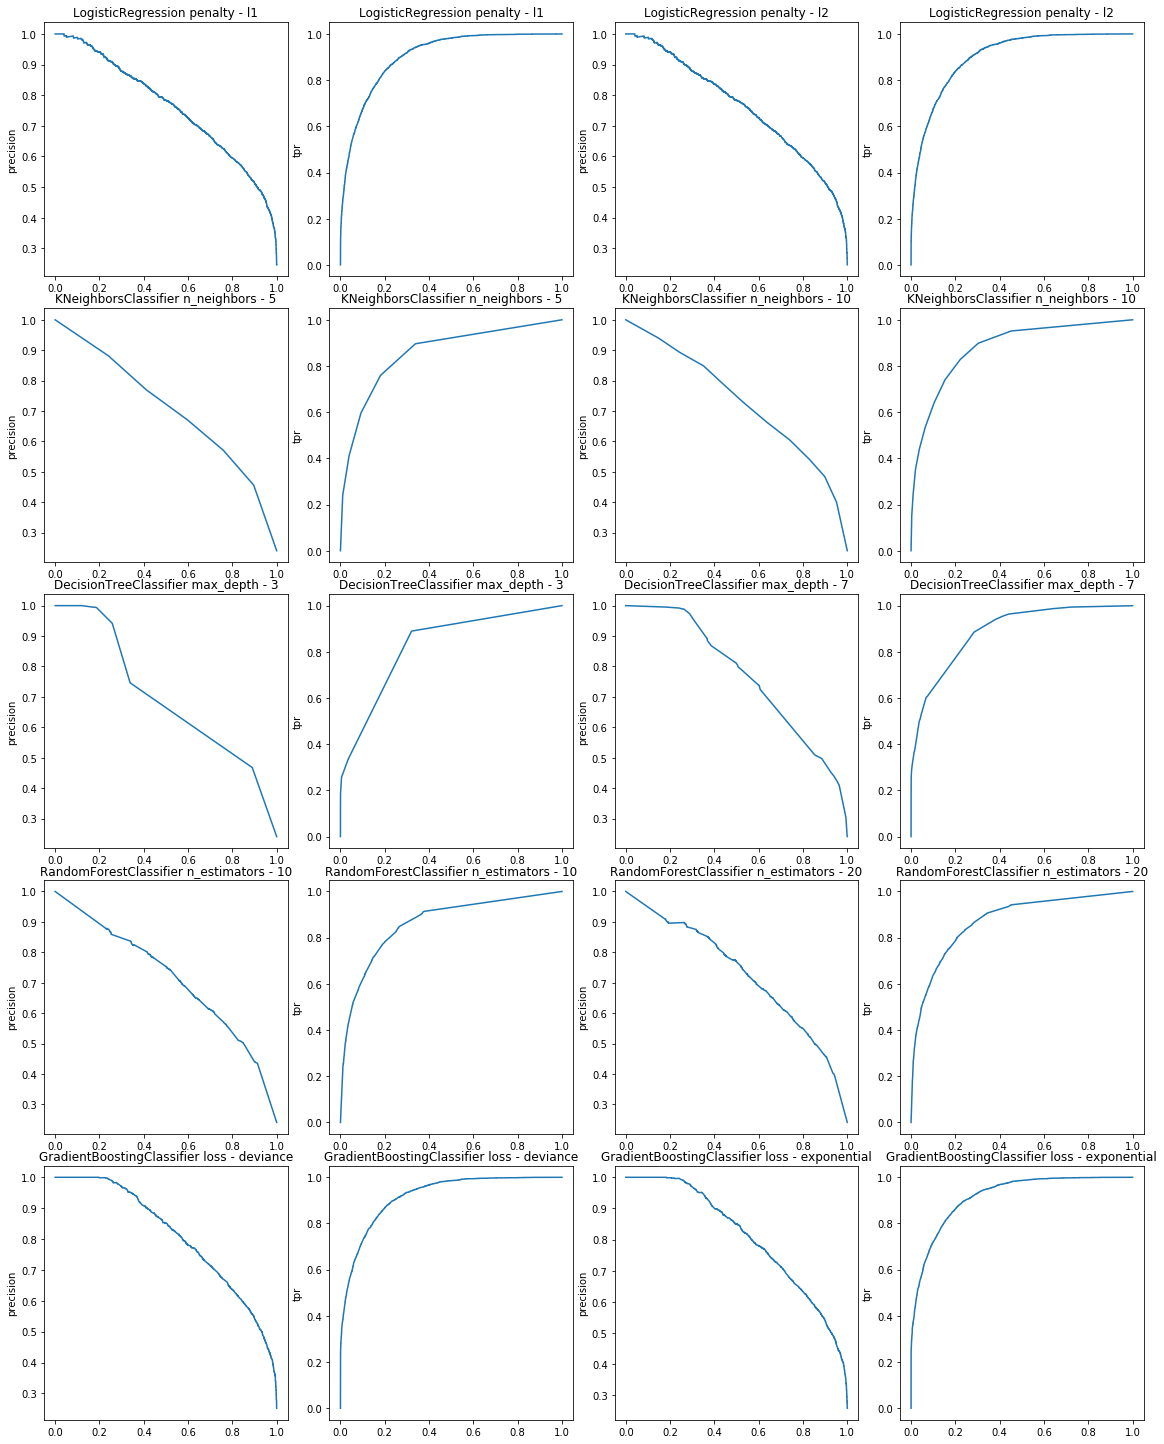

In [25]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(16, 20))
fig.tight_layout()

for idx, model in enumerate(models):
    axes[idx // 2, (idx % 2) * 2].plot( model['result']['recalls'], model['result']['precisions'] )
    axes[idx // 2, (idx % 2) * 2].set_title(model['name'])
#    axes[idx // 2, (idx % 2) * 2].set_xlabel('recall')
    axes[idx // 2, (idx % 2) * 2].set_ylabel('precision')
    axes[idx // 2, (idx % 2) * 2 + 1].plot( model['result']['fpr'], model['result']['tpr'] )
    axes[idx // 2, (idx % 2) * 2 + 1].set_title(model['name'])
#    axes[idx // 2, (idx % 2) * 2 + 1].set_xlabel('fpr')
    axes[idx // 2, (idx % 2) * 2 + 1].set_ylabel('tpr')